# Questionnaire

The questionnaire to ask users at the end of the experiment.

Scale: {`Excellent`, `Good`, `Fair`, `Poor`}

1. Attainment of desired/interesting solution: did you find a solution that you consider interesting or that you had in mind before the beginning of the experiment?
2. System efficiency: was the system efficient in providing you with possible solutions?
3. User-friendliness: how user-friendly was the system?
4. Runtime response: how fast was the system when handling your requests?
5. User fatigue: how tiresome was the experiment?

In [30]:
n_volunteers = 15
n_questions = 5
n_categories = 4

questions_place = {
    'A': 'Attainment of desired/interesting solution',
    'B': 'System efficiency',
    'C': 'User-friendliness',
    'D': 'Runtime response',
    'E': 'User fatigue'
} 

scale = ['', 'Excellent', 'Good', 'Fair', 'Poor']

In [31]:
import numpy as np

responses = np.random.random((n_questions, n_categories))
responses /= np.sum(responses, axis=1)[:, None]
responses *= n_volunteers

C:\Users\rober\AppData\Local\Temp\ipykernel_4332\3338967711.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axd[plot_idx].set_xticklabels(scale)


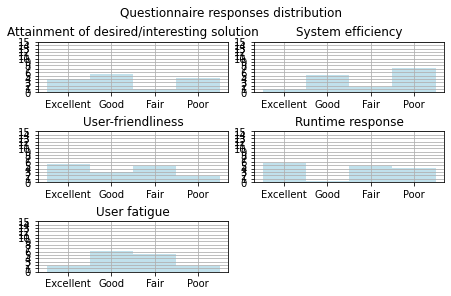

In [32]:
import matplotlib.pyplot as plt

axd = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    CD
    E.
    """
)

for i in range(len(list(questions_place.keys()))):
    plot_idx = list(questions_place.keys())[i]
    axd[plot_idx].bar(np.arange(n_categories), responses[i], 1, color='lightblue', alpha=0.75)
    axd[plot_idx].set_xticklabels(scale)
    axd[plot_idx].set_yticks(np.arange(0, n_volunteers + 1, 1))
    axd[plot_idx].set_title(questions_place[plot_idx])
    axd[plot_idx].grid()

plt.suptitle('Questionnaire responses distribution')

plt.show()

# Emitters ranking

Simulate the ranking of emitters per type and perform the statistical analysis.

In [33]:
import numpy as np

scores = [1, 2, 3]

emitter1_scores = np.random.choice(scores, size=n_volunteers)

emitter2_scores = []
for score in emitter1_scores:
    scores_copy = scores.copy()
    scores_copy.remove(score)
    emitter2_scores.append(np.random.choice(scores_copy))

emitter3_scores = []
for score1, score2 in zip(emitter1_scores, emitter2_scores):
    scores_copy = scores.copy()
    scores_copy.remove(score)
    emitter3_scores.append(np.random.choice(scores_copy))

## Shapiro-Wilk test

Shapiro-Wilk test for normality. We want the statistic to be as close to `1` as possible.

In [34]:
from scipy.stats import shapiro

for i, emitter_scores in enumerate([emitter1_scores, emitter2_scores, emitter3_scores]):
    shapiro_test = shapiro(emitter_scores)
    print(f'Results for scores {i + 1}:')
    print(f'\tShapiro statistic: {shapiro_test.statistic}')
    print(f'\tShapiro p-value: {shapiro_test.pvalue}')

Results for scores 1:
	Shapiro statistic: 0.6288859844207764
	Shapiro p-value: 4.748814899357967e-05
Results for scores 2:
	Shapiro statistic: 0.7436332702636719
	Shapiro p-value: 0.0007582613616250455
Results for scores 3:
	Shapiro statistic: 0.6434077024459839
	Shapiro p-value: 6.561598274856806e-05


## One-way ANOVA

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [35]:
from scipy.stats import f_oneway

F, p = f_oneway(emitter1_scores, emitter2_scores, emitter3_scores)
print('Overall ANOVA:')
print(f'\tF-value: {F}')
print(f'\tp-value: {p}')

F, p = f_oneway(emitter1_scores, emitter2_scores)
print('1-2 ANOVA:')
print(f'\tF-value: {F}')
print(f'\tp-value: {p}')

F, p = f_oneway(emitter1_scores, emitter3_scores)
print('1-3 ANOVA:')
print(f'\tF-value: {F}')
print(f'\tp-value: {p}')

F, p = f_oneway(emitter2_scores, emitter3_scores)
print('2-3 ANOVA:')
print(f'\tF-value: {F}')
print(f'\tp-value: {p}')

Overall ANOVA:
	F-value: 8.816455696202528
	p-value: 0.0006353731035701782
1-2 ANOVA:
	F-value: 9.099999999999998
	p-value: 0.0053908770441631945
1-3 ANOVA:
	F-value: 0.24347826086956514
	p-value: 0.6255533444804928
2-3 ANOVA:
	F-value: 22.1830985915493
	p-value: 6.129223282606367e-05


The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid:
- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test (scipy.stats.kruskal) or the Alexander-Govern test (scipy.stats.alexandergovern) although with some loss of power.

## Ranking plotting

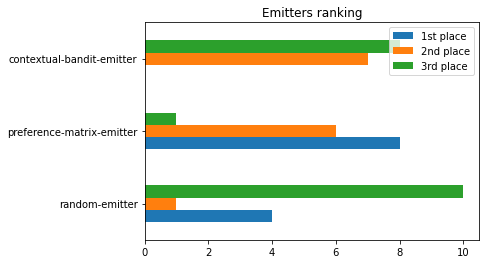

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

emitter_names = ['random-emitter', 'preference-matrix-emitter', 'contextual-bandit-emitter']

first_place_count = [
    np.sum([1 if x == 1 else 0 for x in emitter1_scores]),
    np.sum([1 if x == 1 else 0 for x in emitter2_scores]),
    np.sum([1 if x == 1 else 0 for x in emitter3_scores])
]
second_place_count = [
    np.sum([1 if x == 2 else 0 for x in emitter1_scores]),
    np.sum([1 if x == 2 else 0 for x in emitter2_scores]),
    np.sum([1 if x == 2 else 0 for x in emitter3_scores])
]
third_place_count = [
    np.sum([1 if x == 3 else 0 for x in emitter1_scores]),
    np.sum([1 if x == 3 else 0 for x in emitter2_scores]),
    np.sum([1 if x == 3 else 0 for x in emitter3_scores])
]

df = pd.DataFrame({'1st place': first_place_count,
                   '2nd place': second_place_count,
                   '3rd place': third_place_count
                   }, index=emitter_names)

ax = df.plot.barh()
plt.title('Emitters ranking')
plt.show()

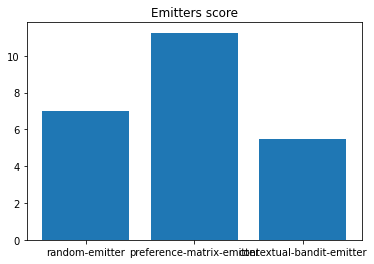

In [39]:
all_values = []
score_to_value = {
    1: 1,
    2: 0.5,
    3: 0.25
}

for arr in [emitter1_scores, emitter2_scores, emitter3_scores]:
    all_values.append([])
    for e in arr:
        all_values[-1].append(score_to_value[e])

plt.bar(emitter_names, height=[np.sum(x) for x in all_values])
plt.title('Emitters score')
plt.show()